## ANOVA(Analysis of Variance)
Ronald Fisher developed it; ANOVA (Analysis of Variance) is a statistical method for analyzing the relationship between more than two independent groups of a variable(comparing their means) and its effect on the numerical dependent variable. 

Why is that? Why can't we use t-tests instead of ANOVA?
It's all about the multiple testing problem.

#### Multiple Testing Problem
When we carry out too many null hypothesis significance tests, our α error(Type 1 error) level increases to a point where the result will not be reliable due to a high chance of falsely getting at least one significant(false positive). Here is how that happens:

P(Type 1 Error) = **α**

P(Not Making An Error) = **1-α**     

P(Not Making An Error in k Test) = **(1-α)^k**

P(Making at Least 1 Error in k Test) = **1 - (1-α)^k**

That means if we conduct 10 tests with a **0.05 α** value, the probability of getting a significant result even though there are no actual significance increases to %40. 
**1-(1-0.05)^10 = 1-(0.95)^10 = 1-0.5987 = 0.4013**

That's why for comparing the means of more than two independent groups, ANOVA is a more appropriate method to apply. There are two types and different variations of ANOVA. 

One Way Anova: Compares the groups' samples means of only one independent variable; hence it's one way. 
Two Way Anova: Compares the groups' means(effect) of two categorical independent variables on one continuous dependent variable.
Manova(Multivariate Analysis of Variance): There are two or more dependent variables

First, let's look at the steps to follow while conducting an ANOVA test.

Step 1: Specify the Null and Alternative Hypotheses 
Step2: Set a significance level of α 
Step 3: Check the data to make sure it complies with ANOVA assumptions
Step 4: Determine the F-critical value
Step 5: Calculate test(F) statistic
Step 6: Interprete the result

#### Example

Let’s create an artificial real-world scenario where ANOVA could be functional.

**40 randomly** chosen students from **3 different** (let’s say the USA, UK, and Germany) countries have participated in a 500m running competition and got their results with the means of ~74s,~88s,~84s, respectively. We want to determine if there is an actual (**statistically significant**) difference between these different students groups regarding their middle-distance running performance or by pure chance if we happened to select better or worse performing students from other countries.

Let’s create this artificial data with a little bit of help from NumPy.

In [1]:
import pandas as pd
import numpy as np
np.random.seed(42)

In [2]:
#Create Artificial randomly distributed data representing students' exam results
USA = np.random.normal(loc=74,scale=4,size=40)
UK = np.random.normal(loc=88,scale=4,size=40)
Germany = np.random.normal(loc=84,scale=4,size=40)

In [3]:
for i in range(3):
    print(['USA: ','UK: ','Germany: '][i],[USA,UK,Germany][i].mean().round(1))

USA:  73.1
UK:  87.9
Germany:  84.0


In [4]:
#Create Dataframes representing each student groups
list_USA = []
for i in range(40): list_USA.append('USA')
df_USA = pd.DataFrame(data={'Country':list_USA,'Results':list(map(lambda x: x.round(1), USA))})
list_UK = []
for i in range(40): list_UK.append('UK')
df_UK = pd.DataFrame(data={'Country':list_UK,'Results':list(map(lambda x: x.round(1), UK))})
list_Germany = []
for i in range(40): list_Germany.append('Germany')
df_Germany = pd.DataFrame(data={'Country':list_Germany,'Results':list(map(lambda x: x.round(1), Germany))})

In [5]:
#Concatenate the data frames into one
df_students = df_USA.append([df_UK,df_Germany],ignore_index=True)
df_students

,Country,Results
0,USA,76.0
1,USA,73.4
2,USA,76.6
3,USA,80.1
4,USA,73.1
...,...,...
115,Germany,85.2
116,Germany,83.9
117,Germany,79.3
118,Germany,88.6


We will take a quick look at our data via histogram and distribution plots.

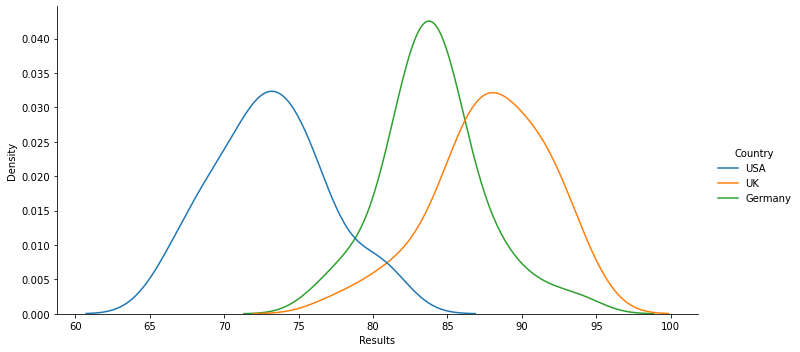

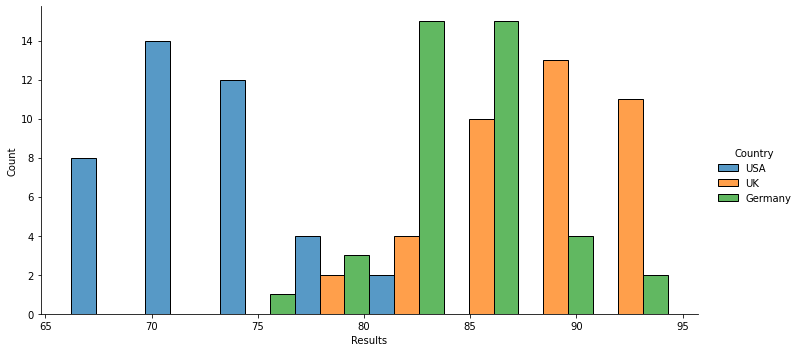

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
sns.displot(df_students,x='Results',hue='Country',multiple='dodge',height=5,aspect=2)

#### ANOVA Assumptions:

1-) Normality: Our response variable is approximately normally distributed for each category of the independent variable.

2-)Homogeneity: Assumption of the equal variance of different samples even if they come from different populations.

3-)Independent Observations: Independent data means that there should be no relationship between the observations within or between the groups themselves.
Normality: To check the normality of our data, since our sample size is small, we will use Shapiro-Wilke Test as our goodness of fit test by using the SciPy stats module.

#### Normality

In [7]:
#Normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."

for i in range(3):
    print(["For the USA: ","For the UK: ","For the Germany: "][i], shapiro_test([USA,UK,Germany][i]))
    print('\n')

For the USA:  Shapiro Wilk Test result didn't show non-normality, W= 0.98, P value= 0.66. There is no evidence to reject the null hypothesis of normality.


For the UK:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.37. There is no evidence to reject the null hypothesis of normality.


For the Germany:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.33. There is no evidence to reject the null hypothesis of normality.




#### Homogeneity

We can use Bartlett’s Test or Levene Test(less sensitive to non-normality) to check for equal variances among all input samples. To do this, we will choose an alpha level. If the return of the p-value from Bartlett’s Test is larger than our alpha level, that means the Null Hypothesis of equal variances stands, otherwise rejected.

Let’s take a quick look at the variances of our groups. The values are pretty close to each other

In [8]:
#Quick look at the variances
[round(np.var(x, ddof=1),3) for x in [USA,UK,Germany]]

[14.526, 14.892, 11.891]

Now we can run carry our goodness of fit (homogeneity) test.

In [9]:
from scipy.stats import bartlett

alpha = 0.05
stat, p_bartlet = bartlett(USA,UK,Germany)
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")

0.7509512418165141 : large p-value suggests that our data is homogeneous


~0.75 huge p-value suggests that our samples have equal variances.

#### Independent Observations

This assumption is based on the researcher’s knowledge and decision about the data source. It’s at the design stage of our test. In our example, if one of the students participated in the competition representing multiple countries, the data would be skewed and wouldn’t represent the actual sample of participants.

Now we are confident that our data fulfilling the assumptions, we can move on to conduct an ANOVA test.

#### Specifying the Null & Alternative Hypothesis

#### Null Hypothesis 

It’s the default hypothesis against our assumptions about the study, which indicates no statistically significant difference between the groups. It can be something like this: There is no difference between the means of group A and group B.
In our example,

#### H0: 
There is no statistically significant difference between the results of these three groups of students.

#### Alternative Hypothesis: 
It states our assumption, so the purpose of our research about the data. It can be something like this: Group A’s mean is significantly different from Group B.
In our example,

#### H1:
There is a statistically significant difference between the performance of the students based on their country.

#### Setting up an Alpha Value

Alpha value(significance level) is generally dependent on the nature of your study; in our example, the commonly used **0.05 α level** is appropriate.


In [10]:
#Setting up alpha value
alpha = 0.05

#### Determining F-critical Value
F-critical is the threshold value that we will compare with our F-statistic. If our F-statistic is more significant than the F-critical value we can reject the null hypothesis. (F-crit <F-stat)

To be able to determine F-critical value, we need:
alpha level,
df1 = k-1 (dfn — degrees of freedom nominator),
df2 = N-k (dfd — degrees of freedom denominator),
where k = number of the groups, N = number of total observations.
and the F distribution table (or the software). As it shows in the table at **alpha=0.05, the F-critical value is ~3.0718.** Let’s if SciPy agrees with it.

In [11]:
from scipy.stats import f 
dfn = len([USA,UK,Germany])-1
dfd = len(df_students) - len([USA,UK,Germany])
f_crit = f.ppf(1-alpha,dfn,dfd)
print(f_crit)

3.073762904449709


In [13]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
# why can we use ols in this case?
anova = ols('Results~Country',data=df_students).fit()

yes, it does!

#### Calculating the Test(F) Statistic and P-value:
Here is the fun part. The formula for the F Statistic is below:

  ![F_Stat_Formula](img/f_stat_formula.png)

#### Explained Variance(between-group variability)
The variance between the group explains how much the means of each group vary from the overall mean. Here is its mathematical formula:
    ![Explained_Variance](img/explained_variance_formula.png)
    
This formula translates to the sum of the difference between each group mean and the overall mean for each data point. It quantifies the variance between the groups.

Let’s check the visuals below to understand this concept better. The first graph illustrates how each group's results in our data vary from the overall mean and in the other graphs, you can see the visualization of different degrees of discrimination between the group distributions relative to their mean difference

In [150]:
print("Overall Mean",round(df_students.Results.mean(),2))
for i in df_students.Country.unique():
    print(f'{i} Mean : ',round(df_students[df_students.Country == i].Results.mean(),2))

Overall Mean 81.68
USA Mean :  73.13
UK Mean :  87.88
Germany Mean :  84.04


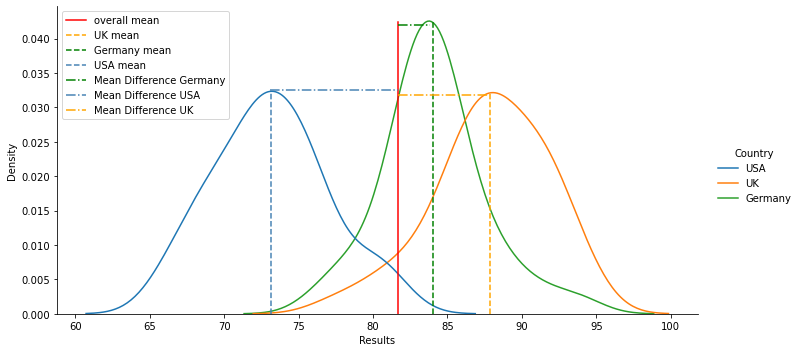

In [145]:
sns.displot(df_students,x='Results',hue='Country',kind='kde',height=5,aspect=2)
plt.axvline(x=df_students.Results.mean(),ymin=0,ymax=0.95,label='overall mean',color='r')
plt.axvline(x=df_students[df_students.Country == 'UK'].Results.mean(),ymin=0,ymax=0.72,linestyle="--",label='UK mean',color='orange')
plt.axvline(x=df_students[df_students.Country == 'Germany'].Results.mean(),ymin=0,ymax=0.95,linestyle="--",label='Germany mean',color='g')
plt.axvline(x=df_students[df_students.Country == 'USA'].Results.mean(),ymin=0,ymax=0.72,linestyle="--",label='USA mean',color='steelblue')
plt.axhline(y=0.042,xmin=0.533,xmax=0.583,color='g',label='Mean Difference Germany',linestyle='-.')
plt.axhline(y=0.0325,xmin=0.332,xmax=0.533,color='steelblue',label='Mean Difference USA',linestyle='-.')
plt.axhline(y=0.0318,xmin=0.533,xmax=0.675,color='orange',label='Mean Difference UK',linestyle='-.')
plt.legend()
plt.show()

##### Different Mean Differences
Visuals below displays how discrimination among the group distributions change according to the difference between their means.

In [162]:
#Test data generator
def anova_test_data(group_size,list_of_groups,list_of_means,std):
    df = pd.DataFrame({'Independent_X':[],'Dependent_Y':[]})
    for i in range(len(list_of_groups)):
        x = np.random.normal(loc=list_of_means[i],scale=std,size=group_size)
        list_x = []
        for j in range(group_size): list_x.append(list_of_groups[i])
        df_x = pd.DataFrame(data={'Independent_X':list_x,'Dependent_Y':list(map(lambda x: x.round(1), x))})
        df = df.append(df_x,ignore_index=True)
    return df,sns.displot(df,x='Dependent_Y',hue='Independent_X',kind='kde',height=5,aspect=2)

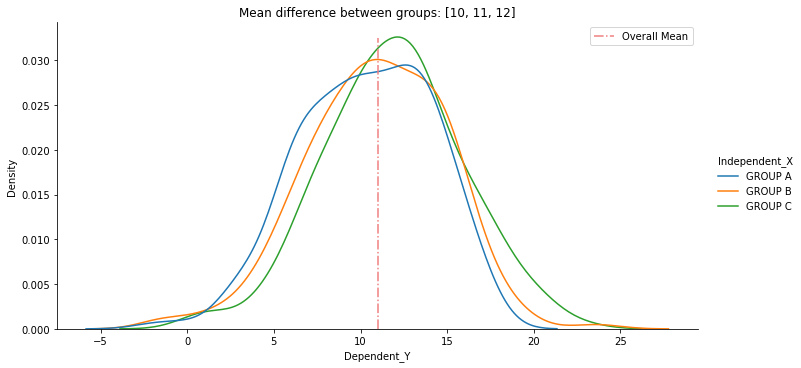

In [163]:
df_0, displot_ = anova_test_data(200,['GROUP A','GROUP B','GROUP C'],[10,11,12],4)
plt.title('Mean difference between groups: ' + str([10,11,12]))
plt.axvline(x=df_0.Dependent_Y.mean(),ymax=0.95,color='lightcoral',linestyle='-.',label='Overall Mean')
plt.legend()
plt.show()

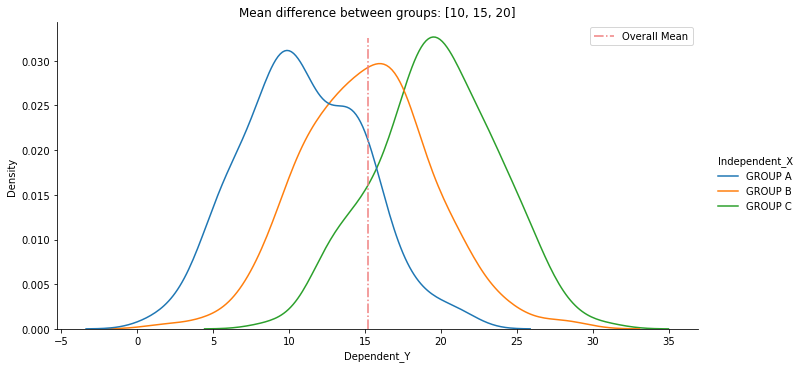

In [164]:
df_0, displot_ = anova_test_data(200,['GROUP A','GROUP B','GROUP C'],[10,15,20],4)
plt.title('Mean difference between groups: ' + str([10,15,20]))
plt.axvline(x=df_0.Dependent_Y.mean(),ymax=0.95,color='lightcoral',linestyle='-.',label='Overall Mean')
plt.legend()
plt.show()

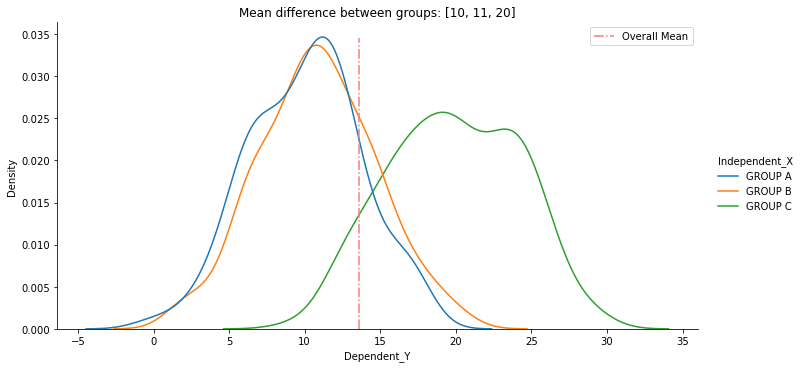

In [165]:
df_0, displot_ = anova_test_data(200,['GROUP A','GROUP B','GROUP C'],[10,11,20],4)
plt.title('Mean difference between groups: ' + str([10,11,20]))
plt.axvline(x=df_0.Dependent_Y.mean(),ymax=0.95,color='lightcoral',linestyle='-.',label='Overall Mean')
plt.legend()
plt.show()

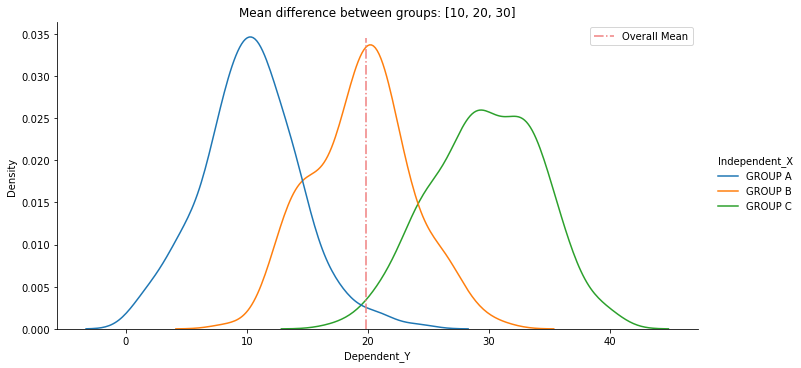

In [166]:
df_0, displot_ = anova_test_data(200,['GROUP A','GROUP B','GROUP C'],[10,20,30],4)
plt.title('Mean difference between groups: ' + str([10,20,30]))
plt.axvline(x=df_0.Dependent_Y.mean(),ymax=0.95,color='lightcoral',linestyle='-.',label='Overall Mean')
plt.legend()
plt.show()

So, to calculate the first part of the formula,SSbetween(SSb), we follow the steps below:

In [169]:
#Calculate overal mean
overal_mean = sum(df_students.Results/len(df_students))

#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sqr_mean_diff = (group_mean-overal_mean)**2
    sum_sqr = len(df_students[df_students.Country == i])*sqr_mean_diff
    ssb.append(sum_sqr)
#Sum of group variability of each group
SSb = sum(ssb)
print(SSb)

4686.961999999989


Then we can find Mean Square Between(MSb) by SSb/(K-1):

In [33]:
#Calculate MSb (Explained Variance)
k = len(df_students.Country.unique())
MSb = SSb/(k-1)
print(MSb)

2343.4809999999943


#### Unexplained Variance(Within Group Variability)
Within-group variability refers to the variance in each group. Take a look at the visuals below: even though sample sizes and the means are the same, as variance increases, the distribution areas get wider and overlap to become a part of a big population. **That’s why variance matters!**


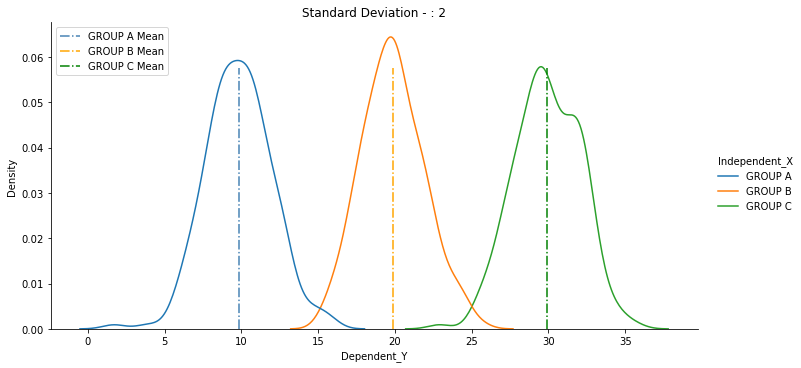

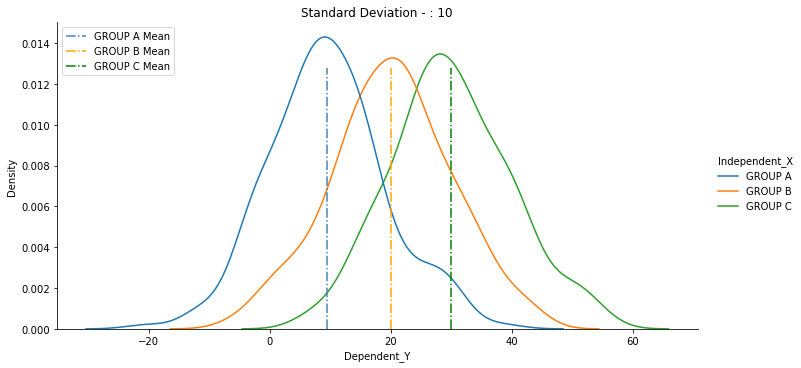

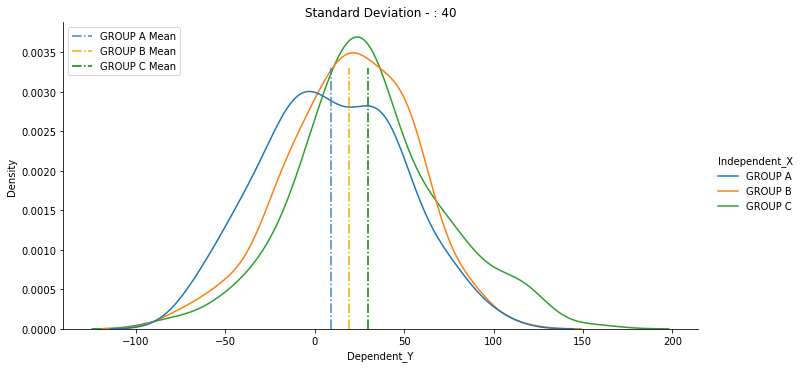

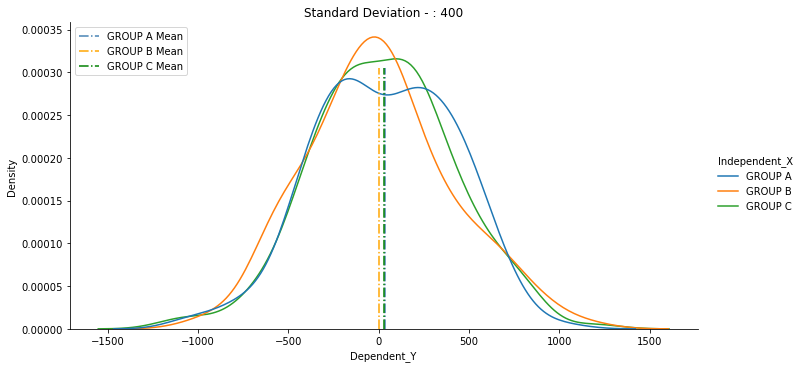

In [171]:
#Different variances
std_list = [2,10,40,400]
for i in std_list:
    title = 'Standard Deviation - : ' + str(i)
    groups = ['GROUP A','GROUP B','GROUP C']
    colors = ['steelblue','orange','g']
    df_std,dis_plot = anova_test_data(200,groups,[10,20,30],i)
    for i in range(len(groups)):
        label = groups[i] + ' Mean'
        plt.axvline(x=df_std[df_std.Independent_X == groups[i]].Dependent_Y.mean(),ymax=0.85,color=colors[i],linestyle='-.',label=label)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

And here is the within-group variance formula:

  ![Unexplained_Variance_Formula](img/unexplained_variance_formula.png)
  
  And this formula translates into calculating the sum of the squared difference between each observation and its group mean(SSw). Then dividing it by the degrees of freedom within the groups, which is derived from number of observations — number of groups(N-K). Let’s do it:

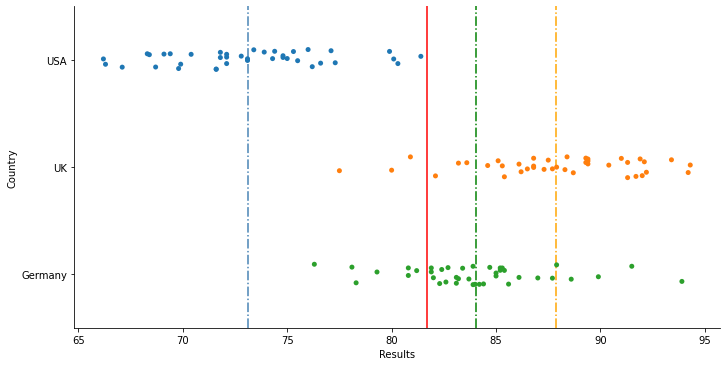

In [172]:
#Display Variance
sns.catplot(y="Country", x="Results", data=df_students,height=5,aspect=2)
plt.axvline(x=df_students.Results.mean(),color='r')
plt.axvline(x=df_students[df_students.Country == 'Germany'].Results.mean(),color='g',linestyle='-.')
plt.axvline(x=df_students[df_students.Country == 'USA'].Results.mean(),color='steelblue',linestyle='-.')
plt.axvline(x=df_students[df_students.Country == 'UK'].Results.mean(),color='orange',linestyle='-.')
plt.show()

In [34]:
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, df_students[df_students.Country == i].Results)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
#Add them together
SSw = sum(sum_sqr_diff)
print("SSw: " + str(SSw))

USA : 567.1197499999998
UK : 582.7777500000002
Germany : 465.9137500000002
SSw: 1615.8112500000002


In [35]:
#Calculate MSw (Unexplained Variance) 
N = len(df_students)
MSw = SSw/(N-k)
print("MSw: ",MSw)


MSw:  13.810352564102566


##### ANOVA table
Before the last step let’s see what our ANOVA table looks like now:

In [136]:
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"], 
                            "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                            "Degrees of Freedom":[k-1,N-k,N-1],
                            "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table

,Sums of Squares,Degrees of Freedom,Mean Squares
Variation Source,,,
Between Groups,4686.96,2,2343.48
Erro Residual,1615.81,117,13.81
Total,6302.77,119,


#### F-Statistic

Now we can calculate the F-statistic ratio:

In [37]:
F_stat = MSb/MSw
F_stat

169.69016461545203

This value is a big F-value. But is it really?

#### P-Value in F-test:

Take a look at the two visuals explaining F-distribution and the P-value:

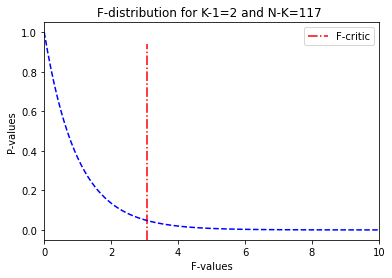

In [114]:
#Find the P-value
from scipy.stats import f, norm
rv = f(dfn=k-1, dfd=N-k)
x = np.linspace(rv.ppf(0.0001),rv.ppf(0.9999),100)
y = rv.pdf(x)

plt.title("F-distribution for K-1=2 and N-K=117 ")
plt.xlim(0,10)
plt.axvline(x=f_crit,color='r',ymax=0.90,linestyle='-.',label='F-critic')
plt.ylabel("P-values")
plt.xlabel("F-values")
plt.legend()
plt.plot(x,y, 'b--')

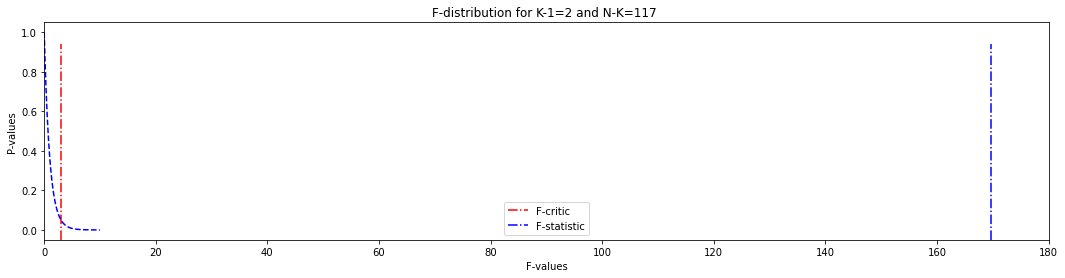

In [115]:
#How much we are far from the 
plt.figure(figsize=(18,4))
from scipy.stats import f, norm
rv = f(dfn=k-1, dfd=N-k)
x = np.linspace(rv.ppf(0.0001),rv.ppf(0.9999),100)
y = rv.pdf(x)

plt.title("F-distribution for K-1=2 and N-K=117 ")
plt.xlim(0,180)
plt.axvline(x=f_crit,color='r',ymax=0.90,linestyle='-.',label='F-critic')
plt.axvline(x=f_stat,color='b',ymax=0.90,linestyle='-.',label='F-statistic')
plt.ylabel("P-values")
plt.xlabel("F-values")
plt.legend()
plt.plot(x,y, 'b--')

Let’s find the P-value associated with this F value, K-1 degrees of freedom(numerator), and N-K degrees of freedom(denominator. ). We will simply find the P-value, by comparing the F-statistic to an F-distribution with K-1 nominator dof. and N-K denominator dof. F-distribution is the distribution of all the possible F-Statistic values at certain nominator and denominator degrees of freedoms.

So we can either use an F distribution table or the software to find the P-value:

In [174]:
#Find the P-value 
p_value = f.sf(f_stat, dfn, dfd) #find p-value of F test statistic
p_value

2.6196800275221696e-35

Going back to our null and alternative hypothesis:

In [133]:
#Reject the null Hypothesis 
if (F_stat > f_crit) & (p_value<alpha):
    print(f"We reject H0 because f-statisitic {F_stat} > f-critical {f_crit} and p-value {p_value} < alpha {alpha}",
         "\nWe have significant evidence at 0.05 level the student groups are belong to different populations.")

We reject H0 because f-statisitic 169.69016461545203 > f-critical 3.073762904449709 and p-value 2.6196800275221696e-35 < alpha 0.05 
We have significant evidence at 0.05 level the student groups are belong to different populations.


#### Interpretation 
Let’s update our ANOVA table:

In [175]:
anova_table["F"] =[f_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]

In [176]:
anova_table

,Sums of Squares,Degrees of Freedom,Mean Squares,F,P-Value
Variation Source,,,,,
Between Groups,4686.96,2,2343.48,169.690165,2.6196800275221696e-35
Erro Residual,1615.81,117,13.81,,
Total,6302.77,119,,,


That’s it! We conducted an ANOVA test (without using the libraries), our aim was to test if the means of running time records of the student groups from three countries were significantly different from each other. Our Null hypothesis was: The means of the results are not significantly different

Alternative Hypothesis was: At least one of the means of the results were significantly different from others

Looking at table above: **We reject H0 because f-statisitic because 169.69016461545203 > f-critical 3.073762904449709 and p-value 2.6196800275221696e-35 < alpha 0.05
We have significant evidence at 0.05 level the running race results of the students from three countries belong to different populations.**

### Shortcut: Source Code ANOVA Test

In [177]:
import pandas as pd
import numpy as np
np.random.seed(42)
#Create Artificial randomly distributed data representing students' exam results
USA = np.random.normal(loc=74,scale=4,size=40)
UK = np.random.normal(loc=88,scale=4,size=40)
Germany = np.random.normal(loc=84,scale=4,size=40)
#Create Dataframes representing each student groups
list_USA = []
for i in range(40): list_USA.append('USA')
df_USA = pd.DataFrame(data={'Country':list_USA,'Results':list(map(lambda x: x.round(1), USA))})
list_UK = []
for i in range(40): list_UK.append('UK')
df_UK = pd.DataFrame(data={'Country':list_UK,'Results':list(map(lambda x: x.round(1), UK))})
list_Germany = []
for i in range(40): list_Germany.append('Germany')
df_Germany = pd.DataFrame(data={'Country':list_Germany,'Results':list(map(lambda x: x.round(1), Germany))})
#Concatenate the data frames into one
df_students = df_USA.append([df_UK,df_Germany],ignore_index=True)
df_students
#Normality:
from scipy import stats
def shapiro_test(x):
    a = 0.05
    test = stats.shapiro(x)
    if test.pvalue <= 0.05:
        return f'The distribution departed from normality significantly, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}'
    else:
        return f"Shapiro Wilk Test result didn't show non-normality, W= {round(test.statistic,2)}, P value= {round(test.pvalue,2)}. There is no evidence to reject the null hypothesis of normality."
for i in range(3):
    print(["For the USA: ","For the UK: ","For the Germany: "][i], shapiro_test([USA,UK,Germany][i]))
    print('\n')
#Homogeneity:
from scipy.stats import bartlett
alpha = 0.05
stat, p_bartlet = bartlett(USA,UK,Germany)
if p_bartlet <= alpha:
    print(p_bartlet,": small p-value suggests that populations do not have equal variances")
else:
    print(p_bartlet, ": large p-value suggests that our data is homogeneous")
#Setting up alpha value
alpha = 0.05
#F_Critical Value/Look up table or:
dfn = len([USA,UK,Germany])-1
dfd = len(df_students) - len([USA,UK,Germany])
f_crit = f.ppf(1-alpha,dfn,dfd)
#Calculate overal mean
overal_mean = sum(df_students.Results/len(df_students))
#Calculate sums of squared mean differences for each observation in each group
ssb = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sqr_mean_diff = (group_mean-overal_mean)**2
    sum_sqr = len(df_students[df_students.Country == i])*sqr_mean_diff
    ssb.append(sum_sqr)
SSb = sum(ssb)
#Calculate MSb (Explained Variance)
k = len(df_students.Country.unique())
MSb = SSb/(k-1)
#Calculate sum of the squared differences between the observations and its group variance for each group
sum_sqr_diff = []
for i in df_students.Country.unique():
    group_mean = df_students[df_students.Country == i].Results.mean()
    sum_sqr = sum(list(map(lambda x: (x-group_mean)**2, df_students[df_students.Country == i].Results)))
    sum_sqr_diff.append(sum_sqr)
    print(i,": "+str(sum_sqr))
SSw = sum(sum_sqr_diff)
#Calculate MSw (Unexplained Variance) 
N = len(df_students)
MSw = SSw/(N-k)
F_stat = MSb/MSw
#Find the P-value 
p_value = f.sf(f_stat, dfn, dfd) #find p-value of F test statistic
anova_table = pd.DataFrame({"Variation Source": ["Between Groups","Erro Residual","Total"], 
                            "Sums of Squares":[round(SSb,2),round(SSw,2),round(SSb+SSw,2)],
                            "Degrees of Freedom":[k-1,N-k,N-1],
                            "Mean Squares":[round(MSb,2),round(MSw,2),""]})
anova_table.set_index("Variation Source",inplace=True)
anova_table["F"] =[f_stat,"",""]
anova_table['P-Value'] = [str(p_value),"",""]
print(anova_table)
#Reject the null Hypothesis 
if (F_stat > f_crit) & (p_value<alpha):
    print(f"We reject H0 because f-statisitic {F_stat} > f-critical {f_crit} and p-value {p_value} < alpha {alpha}",
         "\nWe have significant evidence at 0.05 level the student groups are belong to different populations.")

For the USA:  Shapiro Wilk Test result didn't show non-normality, W= 0.98, P value= 0.66. There is no evidence to reject the null hypothesis of normality.


For the UK:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.37. There is no evidence to reject the null hypothesis of normality.


For the Germany:  Shapiro Wilk Test result didn't show non-normality, W= 0.97, P value= 0.33. There is no evidence to reject the null hypothesis of normality.


0.7509512418165141 : large p-value suggests that our data is homogeneous
USA : 567.1197499999998
UK : 582.7777500000002
Germany : 465.9137500000002
                  Sums of Squares  Degrees of Freedom Mean Squares  \
Variation Source                                                     
Between Groups            4686.96                   2      2343.48   
Erro Residual             1615.81                 117        13.81   
Total                     6302.77                 119                

                           

Finally, Python libraries make it easier:

### ANOVA via Statsmodel

<AxesSubplot:title={'center':'Results'}, xlabel='Country'>

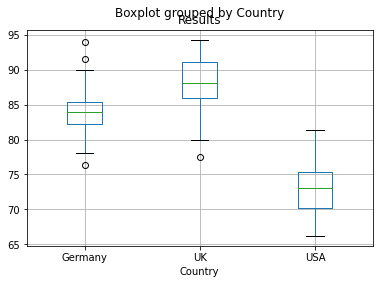

In [42]:
df_students.boxplot("Results",by="Country")

In [178]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
anova_students = ols('Results~Country',data=df_students).fit()
# examine the anova table 
anova_table_sm = sm.stats.anova_lm(anova_students, type=2)
anova_table_sm

,df,sum_sq,mean_sq,F,PR(>F)
Country,2.0,4686.96200,2343.481000,169.690165,2.619680e-35
Residual,117.0,1615.81125,13.810353,NaN,NaN


### Anova via SciPy

In [45]:
stats.f_oneway(df_students['Results'][df_students['Country']=="UK"],
              df_students['Results'][df_students['Country']=="Germany"],
              df_students['Results'][df_students['Country']=="USA"])

F_onewayResult(statistic=169.69016461545252, pvalue=2.619680027521838e-35)